**参考： 1、OpenCV 官方中文教程
代码：https://github.com/opencv/opencv

2、《OpenCV 3计算机视觉 Python语言实现 第二版》**


# 为图像扩边（填充）
如果你想在图像周围创建一个边，就像相框一样，你可以使用 **cv2.copyMakeBorder()**函数。这经常在卷积运算或 0 填充时被用到。这个函数包括如下参数：

    • src 输入图像
    • top, bottom, left, right 对应边界的像素数目。
    • borderType 要添加那种类型的边界，类型如下
        – cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）。
        – cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcdefgh|hgfedcb
        – cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba
        – cv2.BORDER_REPLICATE 重复最后一个元素。例如: aaaaaa|abcdefgh|hhhhhhh
        – cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh|abcdefgh|abcdefg
    • value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT

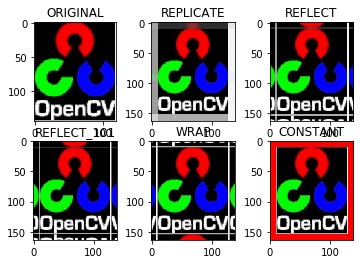

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

BLUE=[255,0,0]
img1=cv2.imread('.\opencv\opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
#plt.xticks([]),plt.yticks([])
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
#plt.axis('off')
plt.show()

结果如上（由于是使用 matplotlib 绘制，所以交换 R 和 B 的位置，OpenCV 中是按 BGR，matplotlib 中是按 RGB 排列）：

# 图像混合
这其实是加法，两幅图像的权重不同，这就会给人一种**混合或者透明**的感觉。图像混合的计算公式如下：$$g(x)= (1-α)f_0(x) + αf_1(x)$$
通过修改 α 的值（0 → 1），可以实现非常酷的混合。
现在我们把两幅图混合在一起。第一幅图的权重是 0.7，第二幅图的权重是 0.3。函数 **cv2.addWeighted()** 可以按下面的公式对图片进行混合操作$$dst = α · img1 + β · img2 + γ$$
这里 $γ$ 的取值为 0。

In [9]:
import cv2
import numpy as np
img1=cv2.imread('./opencv/ml.png')
img2=cv2.imread('./opencv/opencv_logo.png')

cv2.useOptimized()#

e1 = cv2.getTickCount()
# 你的执行代码

rows, cols = img2.shape[:2] #获取高度、宽度
rows,cols
#对第一个文件扩展和缩放
img1_dst = cv2.resize(img1,(cols,rows),interpolation=cv2.INTER_CUBIC) #缩放图像

#img1=img1.reshape(img2.shape)
dst=cv2.addWeighted(img1_dst,0.7,img2,0.3,0)
cv2.imshow('dst',dst)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
#time

cv2.waitKey(0)
cv2.destroyAllWindows()

True

(144, 119)

27

扩展缩放改变图像的尺寸大小。OpenCV 提供的函数 cv2.resize()可以实现这个功能。图像的尺寸可以自己手动设置，你也可以指定缩放因子。推荐使用 cv2.INTER_CUBIC（慢）cv2.INTER_LINEAR的插值方法。

许多 OpenCV 函数都是使用 SSE2、 AVX 等进行优化的，在编译时默认启用它。可以使用 cvUseoptimized 检查是否启用 / 禁用和 cvSetuseoptimized 以启用 / 禁用它。执行结果显示启用了优化。

**cv.getTickCount**函数返回从参考事件（如打开机器的那一刻）到调用此函数那一刻之间的时钟周期数。因此，如果在函数执行之前和之后调用它，则会获得用于执行函数的时钟周期数。

**cv.getTickFrequency**函数返回时钟周期的频率或每秒的时钟周期数。因此，要找到执行时间（以秒为单位），你可以执行以下操作：


# 在IPython中衡量性能
IPython为你提供了一个神奇的命令计时器来执行性能衡量。它会多次运行代码以获得更准确的结果，它们适用于测量单行代码。

In [10]:
x = 5
%timeit y=x**2
%timeit y=np.square(x)


553 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.46 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# 不同色彩空间转换
OpenCV有三种不同色彩空间：灰度、BGR、以及HSV。

    灰度：灰度色彩空间是通过去除彩色信息来将其转换为灰阶，灰度色彩空间对中间处理特别有效，比如人脸检测。
    BGR：即蓝-绿-红组成的色彩空间，每个像素点用三元数组来表示。另外一种为RGB，他们只是在颜色的顺序上不同。比如像素值[0, 255, 255]（没有蓝色，绿色分量取最大值，红色分量取最大值）表示黄色。
    HSV：即色调Hue、饱和度Saturation和明亮程度Value。
    
在 OpenCV 中有超过 150 中进行颜色空间转换的方法。但是你以后就会发现我们经常用到的也就两种：BGR↔Gray 和 BGR↔HSV。

我们要用到的函数是：**cv2.cvtColor(input_image，flag)**，其中 flag就是转换类型。

    对于 BGR↔Gray 的转换，我们要使用的 flag 就是 cv2.COLOR_BGR2GRAY。
    同样对于 BGR↔HSV 的转换，我们用的 flag 就是 cv2.COLOR_BGR2HSV。
    
要获取其他标记，只需在Python终端中运行以下命令:    

In [11]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )


['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

注意 HSV的色相范围为[0,179]，饱和度范围为[0,255]，值范围为[0,255]。不同的软件使用不同的规模。因此，如果你要将OpenCV值和它们比较，你需要将这些范围标准化。

#对象追踪

现在我们知道了如何将BGR图像转换成HSV，我们可以使用它来提取一个有颜色的对象。在HSV中比在BGR颜色空间中更容易表示颜色。在我们的应用程序中，我们将尝试提取一个蓝色的对象。方法如下: - 取视频的每一帧 - 转换从BGR到HSV颜色空间 - 我们对HSV图像设置蓝色范围的阈值 - 现在单独提取蓝色对象，我们可以对图像做任何我们想做的事情。

下面是详细注释的代码:


In [12]:
import cv2 as cv
import numpy as np
img=cv.imread("./OpenCv/ball.png")

# 转换颜色空间 BGR 到 HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# 定义HSV中蓝色的范围
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# 设置HSV的阈值使得只取蓝色
mask = cv.inRange(hsv, lower_blue, upper_blue)
# 将掩膜和图像逐像素相加
res = cv.bitwise_and(img,img, mask= mask)
cv.imshow('Orgi',img)
cv.imshow('mask',mask)
cv.imshow('res',res)
cv.waitKey(0)
cv.destroyAllWindows()

27

# 几何变换
OpenCV 提供了两个变换函数，cv2.warpAffine 和 cv2.warpPerspective，使用这两个函数你可以实现所有类型的变换。cv2.warpAffine 接收的参数是2 × 3 的变换矩阵（参数分别是：原图像、变换矩阵、及变换后的尺寸--先列后行），而 cv2.warpPerspective 接收的参数是 3 × 3 的变换矩阵。

cv2.resize()函数改变图像的大小，实现图像**扩展和缩放**。图像的大小可以手动指定，也可以指定缩放比例。也可使用不同的插值方法。首选的插值方法是**cv.INTER_AREA**用于缩小，**cv.INTER_CUBIC（慢）**和**cv.INTER_LINEAR**用于缩放。默认情况下，出于所有调整大小的目的，使用的插值方法为**cv.INTER_LINEAR**。您可以使用以下方法调整输入图像的大小：


In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('./OpenCV/messi5.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#或者
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)


**平移**就是将对象换一个位置。如果你要沿（x，y）方向移动，移动的距离是$（t_x，t_y）$，就要构建移动矩阵：
$$M=\left [ \matrix{1 & 0 & t_x\cr 0 & 1 & t_y} \right ]$$

对一个图像**旋转**角度 θ, 需要使用到下面形式的旋转矩阵。
$$M =\left [\matrix {cos θ&-sin θ\cr sin θ & cos θ } \right ]$$
但是 OpenCV 允许你在任意地方进行旋转，但是旋转矩阵的形式应该修改为
$$\left [ \matrix{
α&β &(1-α) · center_x-β · center_y\cr
 β& α &β · center_x + (1-α) · center_x
} \right ]$$
其中：
$α = scale · cos θ$,$ β = scale · sin θ$为了构建这个旋转矩阵，OpenCV 提供了一个函数：**cv2.getRotationMatrix2D**。



(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3c8b788>,
 Text(0.5, 1.0, 'ORIGINAL'))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3d20e08>,
 Text(0.5, 1.0, 'dst'))

-1

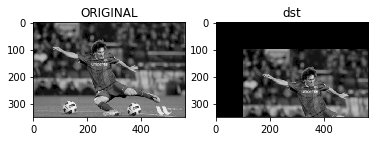

In [14]:
import numpy as np
import cv2 as cv
img = cv.imread('./opencv/messi5.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,100]])#平移矩阵
dst = cv.warpAffine(img,M,(cols,rows))
#cv.imshow('img',dst)
plt.subplot(121),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('dst')

cv.waitKey(0)
cv.destroyAllWindows()

**cv.warpAffine**函数的第三个参数是输出图像的大小，其形式应为(width，height)。记住width =列数，height =行数。

-1

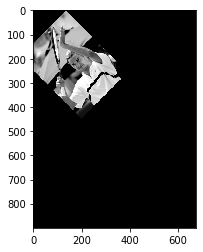

In [15]:
import cv2
import numpy as np
img=cv2.imread('./opencv/fdl.jpg',0)
rows,cols=img.shape
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,0.8) # 得到矩阵
dst=cv2.warpAffine(img,M,(2*cols,2*rows))#变换
plt.imshow(dst,'gray')
cv2.waitKey(0)
cv2.destroyAllWindows()

**仿射变换**是一种二维坐标之间的变换，变换前后保持图形的平直性和平行性。仿射变换可以理解为是向量经过一次线性变换和一次平移变换。

在仿射变换中，原图中所有的平行线在结果图像中同样平行。为了创建这个矩阵我们需要从原图像中**找到三个点以及他们在输出图像中的位置**。然后cv2.getAffineTransform 会创建一个 2x3 的矩阵，最后这个矩阵会被传给函数 cv2.warpAffine。

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3bd5c08>,
 Text(0.5, 1.0, 'Input'))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3c5d3c8>,
 Text(0.5, 1.0, 'Output'))

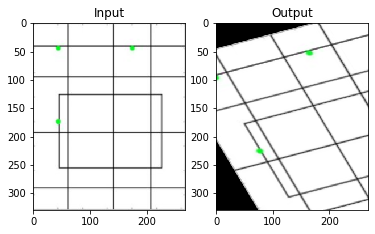

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('./opencv/drawing.png')
rows,cols,ch=img.shape
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])
M=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

**透视变换**（Perspective Transformation)是指利用透视中心、像点、目标点三点共线的条件，按透视旋转定律使承影面（透视面）绕迹线（透视轴）旋转某一角度，破坏原有的投影光线束，仍能保持承影面上投影几何图形不变的变换。

# 图像阈值
**简单阈值**

对于每个像素，应用相同的阈值。如果像素值小于阈值，则将其设置为0，否则将其设置为最大值。函数**cv.threshold**用于应用阈值。第一个参数是源图像，它**应该是灰度图像**。第二个参数是阈值，用于对像素值进行分类。第三个参数是分配给超过阈值的像素值的最大值。OpenCV提供了不同类型的阈值，这由函数的第四个参数给出。所有简单的阈值类型为：

    •cv.THRESH_BINARY
    •cv.THRESH_BINARY_INV
    •cv.THRESH_TRUNC
    •cv.THRESH_TOZERO
    •cv.THRESH_TOZERO_INV

该方法返回两个输出。第一个是使用的阈值，第二个输出是**阈值后的图像**。

此代码比较了不同的简单阈值类型：


(<matplotlib.axes._subplots.AxesSubplot at 0x23cd48e2cc8>,
 <matplotlib.image.AxesImage at 0x23cd28fb2c8>)

Text(0.5, 1.0, 'Original Image')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1e72408>,
 <matplotlib.image.AxesImage at 0x23cc56341c8>)

Text(0.5, 1.0, 'BINARY')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2a5fa08>,
 <matplotlib.image.AxesImage at 0x23cd1f16948>)

Text(0.5, 1.0, 'BINARY_INV')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1db78c8>,
 <matplotlib.image.AxesImage at 0x23cc7c2c788>)

Text(0.5, 1.0, 'TRUNC')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1efda88>,
 <matplotlib.image.AxesImage at 0x23cd27f0f88>)

Text(0.5, 1.0, 'TOZERO')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd25a2c88>,
 <matplotlib.image.AxesImage at 0x23cd2808808>)

Text(0.5, 1.0, 'TOZERO_INV')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

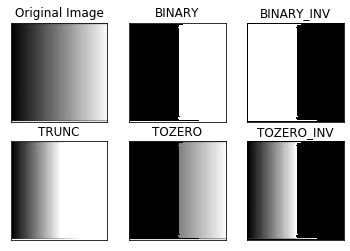

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./opencv/gradient.png',0)#灰度
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


**自适应阈值**

简单阈值并非在所有情况下都很好，例如，如果图像在不同区域具有不同的光照条件。在这种情况下，自适应阈值阈值化可以提供帮助。在此，**算法基于像素周围的小区域确定像素的阈值**。因此，对于同一图像的不同区域，我们获得了不同的阈值，这为光照度变化的图像提供了更好的结果。

除上述参数外，方法**cv.adaptiveThreshold**还包含三个输入参数：

该**adaptiveMethod**决定阈值是如何计算的：

    cv.ADAPTIVE_THRESH_MEAN_C::阈值是邻近区域的平均值减去常数**C**。 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C:阈值是邻域值的高斯加权总和减去常数**C**。

该**BLOCKSIZE**确定附近区域的大小，**C**是从邻域像素的平均或加权总和中减去的一个常数。

下面的代码比较了光照变化的图像的全局阈值和自适应阈值：


(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1e9a688>,
 <matplotlib.image.AxesImage at 0x23cd1d88888>)

Text(0.5, 1.0, 'Original Image')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1d88108>,
 <matplotlib.image.AxesImage at 0x23cd1cfa688>)

Text(0.5, 1.0, 'Global Thresholding (v = 127)')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1cfa788>,
 <matplotlib.image.AxesImage at 0x23cd28eacc8>)

Text(0.5, 1.0, 'Adaptive Mean Thresholding')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd28b7988>,
 <matplotlib.image.AxesImage at 0x23cd1d8c408>)

Text(0.5, 1.0, 'Adaptive Gaussian Thresholding')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

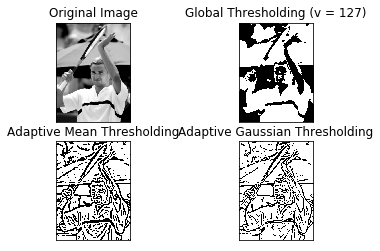

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./opencv/fdl.jpg',0) 
img = cv2.medianBlur(img,5)# 中值滤波
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#11 为 Block size, 2 为 C 值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Otsu的二值化**

在全局阈值化中，我们使用任意选择的值作为阈值。相反，Otsu的方法避免了必须选择一个值并自动确定它的情况。

考虑仅具有两个不同图像值的图像（双峰图像），其中直方图将仅包含两个峰。一个好的阈值应该在这两个值的中间。类似地，**Otsu的方法从图像直方图中确定最佳全局阈值**。

为此，使用了**cv.threshold**作为附加标志传递。阈值可以任意选择。然后，算法找到最佳阈值，该阈值作为第一输出返回。

查看以下示例。输入图像为噪点图像。在第一种情况下，采用值为127的全局阈值。在第二种情况下，直接采用Otsu阈值法。在第三种情况下，首先使用5x5高斯核对图像进行滤波以去除噪声，然后应用Otsu阈值处理。了解噪声滤波如何改善结果。


(<matplotlib.axes._subplots.AxesSubplot at 0x23cc7c23d88>,
 <matplotlib.image.AxesImage at 0x23cd2a89f88>)

(Text(0.5, 1.0, 'Original Noisy Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3c70d88>,
 (array([  1.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   3.,   4.,
           4.,   9.,   9.,   8.,  17.,  15.,   0.,  16.,  28.,  38.,  58.,
          43.,  75., 111.,   0., 122., 151., 244., 276., 387., 456., 555.,
         621.,   0., 660., 764., 773., 845., 819., 805., 756.,   0., 688.,
         644., 588., 490., 427., 298., 252., 221.,   0., 166., 121., 113.,
          75.,  64.,  43.,  37.,   0.,  31.,  28.,  21.,  27.,  36.,  21.,
          31.,  25.,   0.,  17.,  22.,  11.,  13.,   7.,   5.,   3.,   0.,
           6.,   4.,   3.,   2.,   1.,   4.,   2.,   0.,   0.,   1.,   1.,
           4.,   2.,   2.,   2.,   5.,   0.,   3.,   2.,   0.,   3.,   3.,
           3.,   3.,   1.,   0.,   4.,   1.,   3.,   1.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
           2.,   5.,   5.,   4.,  10.,   6.,   0.,   8.,  14.,  16.,  35.,
          36.,  47.,  46.,  75.,   0.,  9

(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2a94588>,
 <matplotlib.image.AxesImage at 0x23cd1fd6d88>)

(Text(0.5, 1.0, 'Global Thresholding (v=127)'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2a8c6c8>,
 <matplotlib.image.AxesImage at 0x23cd3b600c8>)

(Text(0.5, 1.0, 'Original Noisy Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3b07388>,
 (array([  1.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   3.,   4.,
           4.,   9.,   9.,   8.,  17.,  15.,   0.,  16.,  28.,  38.,  58.,
          43.,  75., 111.,   0., 122., 151., 244., 276., 387., 456., 555.,
         621.,   0., 660., 764., 773., 845., 819., 805., 756.,   0., 688.,
         644., 588., 490., 427., 298., 252., 221.,   0., 166., 121., 113.,
          75.,  64.,  43.,  37.,   0.,  31.,  28.,  21.,  27.,  36.,  21.,
          31.,  25.,   0.,  17.,  22.,  11.,  13.,   7.,   5.,   3.,   0.,
           6.,   4.,   3.,   2.,   1.,   4.,   2.,   0.,   0.,   1.,   1.,
           4.,   2.,   2.,   2.,   5.,   0.,   3.,   2.,   0.,   3.,   3.,
           3.,   3.,   1.,   0.,   4.,   1.,   3.,   1.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
           2.,   5.,   5.,   4.,  10.,   6.,   0.,   8.,  14.,  16.,  35.,
          36.,  47.,  46.,  75.,   0.,  9

(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3bff088>,
 <matplotlib.image.AxesImage at 0x23cd24c0b08>)

(Text(0.5, 1.0, "Otsu's Thresholding"),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd24c0908>,
 <matplotlib.image.AxesImage at 0x23cd204de88>)

(Text(0.5, 1.0, 'Gaussian filtered Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd232b748>,
 (array([1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 8.000e+00,
         1.600e+01, 3.400e+01, 6.800e+01, 0.000e+00, 1.640e+02, 2.910e+02,
         5.200e+02, 0.000e+00, 7.850e+02, 1.089e+03, 1.306e+03, 1.477e+03,
         0.000e+00, 1.524e+03, 1.423e+03, 1.178e+03, 8.860e+02, 0.000e+00,
         6.070e+02, 4.480e+02, 2.470e+02, 0.000e+00, 1.760e+02, 1.030e+02,
         7.900e+01, 5.400e+01, 0.000e+00, 5.400e+01, 3.800e+01, 3.900e+01,
         3.500e+01, 0.000e+00, 3.500e+01, 1.000e+01, 1.200e+01, 0.000e+00,
         4.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 1.000e+01,
         8.000e+00, 1.000e+01, 6.000e+00, 0.000e+00, 8.000e+00, 6.000e+00,
         1.000e+01, 0.000e+00, 6.000e+00, 1.400e+01, 8.000e+00, 1.500e+01,
         0.000e+00, 9.000e+00, 1.000e+01, 1.600e+01, 1.200e+01, 0.000e+00,
         2.400e+01, 2.600e+01, 4.200e+01, 0.000e+00, 3.500e+01, 2.400e+01,
         2.200e+01, 2.100e+01, 0.000e+00,

(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2047948>,
 <matplotlib.image.AxesImage at 0x23cd3ca3648>)

(Text(0.5, 1.0, "Otsu's Thresholding"),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

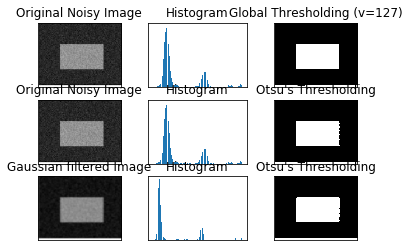

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./opencv/noisy.png',0)
# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


# 图像平滑
使用各种低通滤镜模糊图像 - 将定制的滤镜应用于图像（2D卷积）

## 2D卷积（图像过滤）

与一维信号一样，还可以使用各种低通滤波器（LPF），高通滤波器（HPF）等对图像进行滤波。**LPF有助于消除噪声，使图像模糊等。HPF滤波器有助于在图像中找到边缘**。

OpenCV提供了一个函数**cv.filter2D**来将内核与图像进行卷积。例如，我们将尝试对图像进行平均滤波。5x5平均滤波器内核如下所示：
$$\frac{1}{25}\left [ \matrix{1&1&1&1&1 \cr 1&1&1&1&1 \cr 1&1&1&1&1 \cr 1&1&1&1&1 \cr 1&1&1&1&1}\right ]$$

 
操作如下:保持这个内核在一个像素上，将所有低于这个内核的25个像素相加，取其平均值，然后用新的平均值替换中心像素。它将对图像中的所有像素继续此操作。试试这个代码，并检查结果:


(<matplotlib.axes._subplots.AxesSubplot at 0x23cd1fd6308>,
 Text(0.5, 1.0, 'Original'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3d203c8>,
 Text(0.5, 1.0, 'Averaging'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

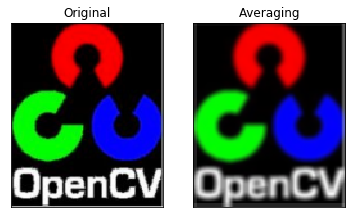

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./opencv/opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])#无横纵坐标信息
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


### 高通滤波器HPF
高通滤波器是检查图像的某个区域，根据像素与周围像素的亮度差值来提升（boost）该像素亮度的滤波器。高通滤波有一个称为半径的属性，它决定多大面积的邻近像素参与滤波运算。<br />
核是指一组权重的集合，它会应用在源图像的一个区域，并由此生成目标图像的一个像素，如卷积中的操作。以如下的核(kernal)为例：

[[0, -0.25, 0],

 [-0.25, 1, -0.25],

 [0, -0.25, 0]]

在计算完中央像素与周围邻近像素的亮度差值之和以后，如果亮度变化很大，中央像素的亮度会增加（反之则不会）。换句话说，如果一个像素比它周围的像素更突出，就会提升它的亮度。这在边缘检测上尤其有效，它会采用一种称为高频提升滤波器(high boost filter)的高通滤波器。

### 低通滤波器

高通滤波器是根据像素与邻近像素的亮度差值来提升该像素的亮度。低通滤波器(Low Pass Filter, LPF)则是在像素与周围像素的亮度差值小于一个特定值时，平滑该像素的亮度。它主要用于**去噪和模糊化**，比如说，高斯模糊是最常用的模糊滤波器（平滑滤波器）之一，它是一个削弱高频信号信息强度的低通滤波器。


## 图像模糊（图像平滑）

通过将图像与低通滤波器内核进行卷积来实现图像模糊。这对于消除噪音很有用。它实际上从图像中消除了高频部分（例如噪声，边缘）。因此，在此操作中边缘有些模糊。（有一些模糊技术也可以不模糊边缘）。OpenCV主要提供四种类型的模糊技术。

**1.平均**

这是通过将图像与归一化框滤镜进行卷积来完成的。它仅获取内核区域下所有像素的平均值，并替换中心元素。这是通过功能**cv.blur()或**cv.boxFilter()完成的。函数应该指定内核的宽度和高度。上面卷积中的5x5就是一个归一化框式过滤器

注意如果您不想使用标准化的框式过滤器，请使用**cv.boxFilter()**。将参数normalize = False传递给函数。

查看下面的示例演示，其内核大小为5x5：


**2.高斯模糊**

在这种情况下，代替盒式滤波器，使用了高斯核。这是通过功能**cv.GaussianBlur()** 完成的。我们应指定内核的宽度和高度，该宽度和高度应为正数和奇数。我们还应指定X和Y方向的标准偏差，分别为sigmaX和sigmaY。如果仅指定sigmaX，则将sigmaY与sigmaX相同。如果两个都为零，则根据内核大小进行计算。**高斯模糊对于从图像中去除高斯噪声非常有效**。

如果需要，可以使用函数**cv.getGaussianKernel()** 创建高斯内核。

**3.中位模糊**

在这里，函数**cv.medianBlur()** 提取内核区域下所有像素的中值，并将中心元素替换为该中值。这对于消除图像中的椒盐噪声非常有效。有趣的是，在上述过滤器中，中心元素是新计算的值，该值可以是图像中的像素值或新值。但是在中值模糊中，中心元素总是被图像中的某些像素值代替。有效降低噪音。其内核大小应为正奇数整数。

**4.双边滤波**

**cv.bilateralFilter()** 在去除噪声的同时保持边缘清晰锐利非常有效。但是，与其他过滤器相比，该操作速度较慢。我们已经看到，高斯滤波器采用像素周围的邻域并找到其高斯加权平均值。高斯滤波器仅是空间的函数，也就是说，滤波时会考虑附近的像素。它不考虑像素是否具有几乎相同的强度。它不考虑像素是否是边缘像素。因此它也模糊了边缘，这是我们不想做的。

双边滤波器在空间中也采用高斯滤波器，但是又有一个高斯滤波器，它是像素差的函数。空间的高斯函数确保仅考虑附近像素的模糊，而强度差的高斯函数确保仅考虑强度与中心像素相似的那些像素的模糊。由于边缘的像素强度变化较大，因此可以保留边缘。


(<matplotlib.axes._subplots.AxesSubplot at 0x23cd3d4a7c8>,
 Text(0.5, 1.0, 'Original'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd20bd5c8>,
 Text(0.5, 1.0, 'Blurred'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd20d8948>,
 Text(0.5, 1.0, 'GaussBlurred'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2115448>,
 Text(0.5, 1.0, 'Medianblured'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd214e908>,
 Text(0.5, 1.0, 'Bilatblured'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

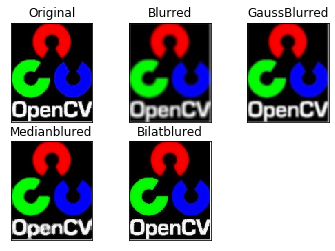

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./opencv/opencv_logo.png')
blur = cv.blur(img,(5,5))#平均：使用归一化框滤镜
Gaussblur = cv.GaussianBlur(img,(5,5),0)#高斯模糊
Medianblur = cv.medianBlur(img,5)#中位模糊
Bilatblur = cv.bilateralFilter(img,9,75,75)#双边滤波


plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(Gaussblur),plt.title('GaussBlurred')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(Medianblur),plt.title('Medianblured')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(Bilatblur),plt.title('Bilatblured')
plt.xticks([]), plt.yticks([])
plt.show()


# 形态学转换
形态学操作，如侵蚀，膨胀，开运算，闭运算等。 形态变换是一些基于图像形状的简单操作。通常在二进制图像上执行。它需要两个输入，一个是我们的原始图像，第二个是决定**操作性质的结构元素**或**内核**。两种基本的形态学算子是**侵蚀和膨胀**。然后，它的变体形式（如“打开”，“关闭”，“渐变”等）也开始起作用。

**1. 侵蚀**

侵蚀的基本思想就像土壤侵蚀一样，它侵蚀前景物体的边界(尽量使前景保持白色)。它是做什么的呢?内核滑动通过图像(在2D卷积中)。原始图像中的一个像素(无论是1还是0)**只有当内核下的所有像素都是1时才被认为是1**，否则它就会被侵蚀(变成0)。

结果是，根据内核的大小，边界附近的所有像素都会被丢弃。因此，前景物体的厚度或大小减小，或只是图像中的白色区域减小。它有助于去除小的白色噪声(正如我们在颜色空间章节中看到的)，分离两个连接的对象等。

**2. 扩张**

它与侵蚀正好相反。如果内核下的至少一个像素为“ 1”，则像素元素为“ 1”。因此，它会增加图像中的白色区域或增加前景对象的大小。通常，在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体。因此，我们对其进行了扩展。由于噪音消失了，它们不会回来，但是我们的目标区域增加了。在连接对象的损坏部分时也很有用。

**3. 开运算**

开放只是**侵蚀然后扩张**的另一个名称。如上文所述，它对于消除噪音很有用。在这里，我们使用函数**cv.morphologyEx**()

**4. 闭运算**

闭运算与开运算相反，先扩张然后再侵蚀。在关闭前景对象内部的小孔或对象上的小黑点时很有用。

**5.形态学梯度**

这是图像扩张和侵蚀之间的区别。

结果将看起来像对象的轮廓。


(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2338fc8>,
 Text(0.5, 1.0, 'Original'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd236ce88>,
 Text(0.5, 1.0, 'erosion'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2350988>,
 Text(0.5, 1.0, 'dilation'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd23c9648>,
 Text(0.5, 1.0, 'opening'))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd23f2f48>,
 Text(0.5, 1.0, 'gradient'))

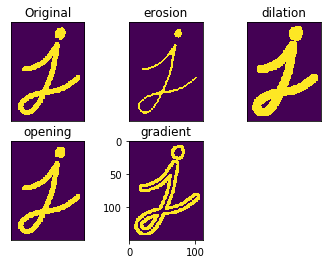

In [22]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./opencv/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)#侵蚀
dilation = cv.dilate(img,kernel,iterations = 1) #扩展
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) #开运算
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) #形态学梯度

plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dilation),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(gradient),plt.title('gradient')

# 图像梯度

在本章中，我们将学习： - 查找图像梯度，边缘等 - 我们将看到以下函数：cv.Sobel()，cv.Scharr()，cv.Laplacian()等。

OpenCV提供三种类型的梯度滤波器或高通滤波器，即**Sobel，Scharr和Laplacian**。

**1. Sobel 和 Scharr 算子**

Sobel算子是高斯平滑加微分运算的联合运算，因此它更抗噪声。逆可以指定要采用的导数方向，垂直或水平（分别通过参数yorder和xorder）。逆还可以通过参数ksize指定内核的大小。如果ksize = -1，则使用3x3 Scharr滤波器，比3x3 Sobel滤波器具有更好的结果。请参阅文档以了解所使用的内核。

**2. Laplacian 算子**

它计算了由关系Δsrc=∂ 2 src∂x 2  +∂ 2 src∂y 2   
Δsrc=∂2src∂x2+∂2src∂y2
给出的图像的拉普拉斯图,它是每一阶导数通过Sobel算子计算。如果ksize = 1,然后使用以下内核用于过滤:



kernel=⎡ ⎣ ⎢ 010 1−41 010 ⎤ ⎦ ⎥  
kernel=[0101−41010]
 
代码

下面的代码显示了单个图表中的所有算子。所有内核都是5x5大小。输出图像的深度通过-1得到结果的np.uint8型。


# 边缘检测

　　OpenCV提供了许多**边缘检测滤波函数**，包括**Laplacian()、Sobel()以及Scharr()**。这些滤波函数都会将非边缘区域转为黑色，将边缘区域转为白色或其他饱和的颜色。但是，这些函数都很**容易将噪声错误地识别为边缘**。缓解这个问题的方法是在找到边缘之前对图像进行**模糊处理**。OpenCV也提供了许多**模糊滤波函数**，包括**blur()**（简单的算术平均）、**medianBlur()**以及**GaussianBlur()**。边缘检测滤波函数和模糊滤波函数的参数有很多，但总会有一个ksize参数，它是一个奇数，表示滤波器的宽和高（以像素为单位）。

这里使用medianBlur()作为模糊函数，它对去除数字化的视频噪声非常有效，特别是去除彩色图像的噪声；使用Laplacian()作为边缘检测函数，它会产生明显的边缘线条，灰度图像更是如此。在使用medianBlur()函数之后，将要使用Laplacian()函数之前，需要将图像从BGR色彩空间转为灰度色彩空间。

在得到Laplacian()函数的结果之后，需要将其转换成黑色边缘和白色背景的图像。然后将其归一化（使它的像素值在0到1之间），并乘以源图像以便能将边缘变黑。

注意，核的大小可由strokeEdges()函数的参数来指定。blurKsize参数会 作为medianBlur()含糊的ksize参数，edgeKsize参数会作为Laplacian()函数的ksize参数。对于作者的摄像头，将blurKsize值设为7，将edgeKsize值设为5会得到最好的效果。但对于较大的ksize（比如7），使用medianBlur()的代价很高。如果在使用strokeEdges()函数时遇到性能问题，可试着减小blurKsize的值。要关闭模糊效果，可以将blurKsize的值设为3以下。


OpenCV将以上所有内容放在单个函数**cv.Canny**()中。我们将看到如何使用它。

    第一个参数是我们的输入图像。
    第二个和第三个参数分别是我们的minVal和maxVal。
    第三个参数是perture_size。它是用于查找图像渐变的Sobel内核的大小。默认情况下为3。
    最后一个参数是L2gradient，它指定用于查找梯度幅度的方程式。如果为True，则使用上面提到的更精确的公式，否则使用以下函数：
$$Edge_Gradient(G)=|G x |+|G y | $$
        。默认情况下，它为False。

(<matplotlib.axes._subplots.AxesSubplot at 0x23ccfbb9a88>,
 <matplotlib.image.AxesImage at 0x23cd2520e48>)

(Text(0.5, 1.0, 'Original Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x23cd2515608>,
 <matplotlib.image.AxesImage at 0x23cd261a8c8>)

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

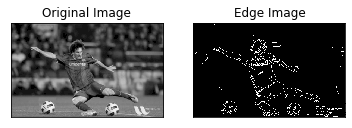

In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./OpenCV/messi5.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


# 图像金字塔

目标：我们将学习图像金字塔 - 使用图像金字塔创建一个新的水果“Orapple” - 我们将看到以下功能：**cv.pyrUp()，cv.pyrDown()**

理论

通常，我们过去使用的是恒定大小的图像。但是在某些情况下，我们需要使用不同分辨率的（相同）图像。例如，当在图像中搜索某些东西（例如人脸）时，我们不确定对象将以多大的尺寸显示在图像中。在这种情况下，我们将需要创建一组具有不同分辨率的相同图像，并在所有图像中搜索对象。这些具有不同分辨率的图像集称为**“图像金字塔”**（因为当它们堆叠在底部时，最高分辨率的图像位于顶部，最低分辨率的图像位于顶部时，看起来像金字塔）。

有两种图像金字塔。1）**高斯金字塔**和2）**拉普拉斯金字塔**

**高斯金字塔**中的较高级别（低分辨率）是通过删除较低级别（较高分辨率）图像中的连续行和列而形成的。然后，较高级别的每个像素由基础级别的5个像素的贡献与高斯权重形成。通过这样做，M×N 图像变成M/2×N/2 图像。因此面积减少到原始面积的四分之一。它称为**Octave**。当我们在金字塔中越靠上时（即分辨率下降），这种模式就会继续。同样，在扩展时，每个级别的面积变为4倍。我们可以使用**cv.pyrDown**()和**cv.pyrUp**()函数找到高斯金字塔。


**拉普拉斯金字塔**由高斯金字塔形成。没有专用功能。拉普拉斯金字塔图像仅像边缘图像。它的大多数元素为零。它们用于图像压缩。拉普拉斯金字塔的层由高斯金字塔的层与高斯金字塔的高层的扩展版本之间的差形成。


# 轮廓
什么是轮廓?轮廓可以简单地解释为连接具有相同颜色或强度的所有连续点（沿边界）的曲线。轮廓是用于形状分析以及对象检测和识别的有用工具。

    •为了获得更高的准确性，请使用二进制图像。因此，在找到轮廓之前，请应用阈值或canny边缘检测。
    •从OpenCV 3.2开始，findContours()不再修改源图像。
    •在OpenCV中，找到轮廓就像从黑色背景中找到白色物体。因此请记住，要找到的对象应该是白色，背景应该是黑色。

让我们看看如何找到二进制图像的轮廓：


In [5]:
import numpy as np
import cv2 as cv
img = cv.imread('./OpenCV/fdl.jpg')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
binary,contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


**findcontour()函数**中有三个参数，第一个是源图像，第二个是轮廓检索模式，第三个是轮廓逼近方法。输出等高线和层次结构。轮廓是图像中所有轮廓的Python列表。每个单独的轮廓是一个(x,y)坐标的Numpy数组的边界点的对象。


    •第二个参数有什么用？对于轮廓来说可能还包含父子关系，也就是说一个轮廓里面可能还包含着其他轮廓（比如说房子的轮廓可以包含一个矩形的窗户，则房子为父，窗户为子，而窗户里可能有个人的头，这又是一种父子关系），这其中的层次结构可以通过对第二个参数设置来选择是否获取。

        RETR_LIST 从解释的角度来看，这中应是最简单的。它只是提取所有的轮廓，而不去创建任何父子关系。
        RETR_EXTERNAL 如果你选择这种模式的话，只会返回最外边的的轮廓，所有的子轮廓都会被忽略掉。
        RETR_CCOMP 在这种模式下会返回所有的轮廓并将轮廓分为两级组织结构。
        RETR_TREE 这种模式下会返回所有轮廓，并且创建一个完整的组织结构列表。它甚至会告诉你谁是爷爷，爸爸，儿子，孙子等。


    •findContours()第三个参数什么意思呢？如果设为cv2.CHAIN_APPROX_NONE，，表示边界所有点都会被储存；而如果设为cv2.CHAIN_APPROX_SIMPLE 会压缩轮廓，将轮廓上冗余点去掉，比如说四边形就会只储存四个角点。


函数**cv2.drawContours()**被用来绘制轮廓。第一个参数是一张图片，可以是原图或者其他。第二个参数是轮廓，也可以说是cv2.findContours()找出来的点集，一个列表。第三个参数是对轮廓（第二个参数）的索引，当需要绘制独立轮廓时很有用，若要全部绘制可设为-1。接下来的参数是轮廓的颜色和厚度。




In [8]:
#创建白色幕布
temp = np.ones(imgray.shape,np.uint8)*255
#画出轮廓：temp是白色幕布，contours是轮廓，-1表示全画，然后是颜色，厚度
cv.drawContours(temp,contours,-1,(0,255,0),3)

cv.imshow("contours",temp)
cv.waitKey(0)
cv.destroyAllWindows()
